In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility

from tensorflow import keras

#keras model module
from keras.models import Sequential

#ceras core layers
from keras.layers import Dense, Dropout, Activation, Flatten

#cnn layars
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils

#Load image data from MNIST.
from keras.datasets import mnist

#Matplot lib
from matplotlib import pyplot as plt

In [ ]:
#Formating strings
C_FMT_TRAIN_LEN = 'The lenght of the training set {} is {} images.';
C_FMT_TEST_LEN = 'The lenght of the test set {} is {} images';
C_FMT_DATA_DIMM = 'The dimensions of the data are : {}';

In [ ]:
#Shows subplot of images for given image list
def ShowGridPlotImgs(imageList, width=20, height=20, columns=10, rows=10):   
    fig=plt.figure(figsize=(8, 8))    
    for i in range(1, columns*rows + 1):        
        fig.add_subplot(rows, columns, i);
        plt.imshow(imageList[i]);
    plt.show();

The lenght of the training set X is 60000 images.
The lenght of the training set y is 60000 images.
The lenght of the test set X is 10000 images
The lenght of the test set y is 10000 images
The dimensions of the data are : (60000, 28, 28)
First 100 train images


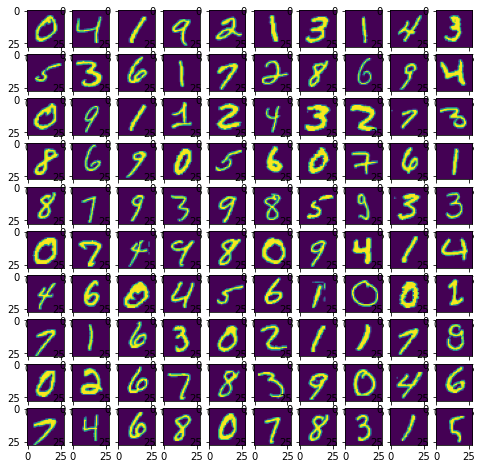

In [32]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data();

#Show info about traing and testing data
print(C_FMT_TRAIN_LEN.format('X', len(X_train) ) );
print(C_FMT_TRAIN_LEN.format('y', len(y_train) ) );
print(C_FMT_TEST_LEN.format('X', len(X_test) ) );
print(C_FMT_TEST_LEN.format('y', len(y_test) ) );
      
print (C_FMT_DATA_DIMM.format(X_train.shape) );
# (60000, 28, 28)

print('First 100 train images');
ShowGridPlotImgs(X_train);

In [33]:
#Reshape input dataPython
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [34]:
#todo normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('After normailzation');
print(X_train[0])

After normailzation
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.     

In [35]:

print (y_train.shape)
print (y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [36]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10);
Y_test = np_utils.to_categorical(y_test, 10);

print (Y_train.shape)

(60000, 10)


In [37]:
#Declare Sequential modelPython

model = Sequential()

In [38]:
#CNN input layerPython
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first') )

print (model.output_shape)
# (None, 32, 26, 26)

(None, 32, 26, 26)


In [39]:

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [40]:
#Compile modelPython
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
#Fit Keras modelPython

model.fit(X_train, Y_train, 
          batch_size=32, epochs=3, verbose=1)


Epoch 1/3
60000/60000 [==============================] - 52s 860us/step - loss: 0.2809 - accuracy: 0.9147
Epoch 2/3
60000/60000 [==============================] - 51s 851us/step - loss: 0.1091 - accuracy: 0.9688
Epoch 3/3
60000/60000 [==============================] - 51s 849us/step - loss: 0.0849 - accuracy: 0.9750


In [41]:
#Evalluate keras model
score = model.evaluate(X_test, Y_test, verbose=0)

In [42]:
print(score)

[2.2904459983825682, 0.16300000250339508]


In [19]:
from keras.models import save_model;
filepath = 'simple_numbers_1.h5'
save_model(model, filepath)

In [43]:

prediction = model.predict(X_test)

In [44]:
print(prediction)

[[0.1066043  0.10420857 0.09895351 ... 0.08703575 0.10949366 0.09465686]
 [0.10269506 0.09279034 0.10295483 ... 0.08885387 0.11783401 0.08368769]
 [0.10591269 0.09921131 0.10242408 ... 0.08939428 0.11279274 0.09046324]
 ...
 [0.11204529 0.10283026 0.09470589 ... 0.08374568 0.11432613 0.08939181]
 [0.10523989 0.09494599 0.09372614 ... 0.09121785 0.1098678  0.09437756]
 [0.10864031 0.09486689 0.10005835 ... 0.08875695 0.1094841  0.08765613]]


In [ ]:
print(np.argmax(prediction[0]))
#print(X_test[0])


In [24]:
#plt.imshow(Y_test[0],cmap=plt.cm.binary)

In [51]:
from keras.models import load_model;


currModel = load_model('simple_numbers_1.h5',custom_objects={'Scale': Scale()}, compile=False);

NameError: name 'Scale' is not defined